In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows=50
pd.options.display.max_columns=10

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,4)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
data=pd.read_excel("POCM_HISTORICAL.xlsx",engine='openpyxl')
data.head()

,Checkout_Date,Order_Nbr,Item_Nbr,Zip_Code,WSLR_Nbr,...,Order_Quantity,LastModId,LastModMachine,LastModApp,LastModTsp
0,2018-12-04,100003,5000268,63118,0,...,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
1,2018-12-04,100012,1093107,10011,0,...,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2,2018-12-05,100030,1090635,20772,0,...,5,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
3,2018-12-05,100030,5003134,20772,0,...,10,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
4,2018-12-05,100030,5007384,20772,0,...,20,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10


In [51]:
a=list(data['Checkout_Date'])
a

[Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-

In [4]:
df=data[["Checkout_Date","Order_Quantity"]]

In [5]:
df

,Checkout_Date,Order_Quantity
0,2018-12-04,1
1,2018-12-04,1
2,2018-12-05,5
3,2018-12-05,10
4,2018-12-05,20
...,...,...
160572,2020-05-15,5
160573,2020-05-15,20
160574,2020-05-15,2
160575,2020-05-15,3


In [50]:
df1= df.groupby("Checkout_Date").sum()
df1

,Order_Quantity
Checkout_Date,
2018-12-04,2
2018-12-05,79
2018-12-06,422
2018-12-07,468
2018-12-08,111
...,...
2020-05-11,2749
2020-05-12,3366
2020-05-13,1491


In [52]:
df2= df.groupby("Checkout_Date").sum().reset_index()
df2

,Checkout_Date,Order_Quantity
0,2018-12-04,2
1,2018-12-05,79
2,2018-12-06,422
3,2018-12-07,468
4,2018-12-08,111
...,...,...
465,2020-05-11,2749
466,2020-05-12,3366
467,2020-05-13,1491
468,2020-05-14,6631


In [53]:
b= list(df2['Checkout_Date'])
b

[Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-07 00:00:00'),
 Timestamp('2018-12-08 00:00:00'),
 Timestamp('2018-12-10 00:00:00'),
 Timestamp('2018-12-11 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-13 00:00:00'),
 Timestamp('2018-12-14 00:00:00'),
 Timestamp('2018-12-15 00:00:00'),
 Timestamp('2018-12-17 00:00:00'),
 Timestamp('2018-12-18 00:00:00'),
 Timestamp('2018-12-19 00:00:00'),
 Timestamp('2018-12-20 00:00:00'),
 Timestamp('2018-12-21 00:00:00'),
 Timestamp('2018-12-24 00:00:00'),
 Timestamp('2018-12-26 00:00:00'),
 Timestamp('2018-12-27 00:00:00'),
 Timestamp('2018-12-28 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-01-02 00:00:00'),
 Timestamp('2019-01-03 00:00:00'),
 Timestamp('2019-01-04 00:00:00'),
 Timestamp('2019-01-06 00:00:00'),
 Timestamp('2019-01-07 00:00:00'),
 Timestamp('2019-01-08 00:00:00'),
 Timestamp('2019-01-09 00:00:00'),
 Timestamp('2019-01-

In [7]:
df['Checkout_Date'].max() - df['Checkout_Date'].min()

Timedelta('528 days 00:00:00')

In [8]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [9]:
np.random.seed(7)

In [10]:
dataset = df1.values
dataset = dataset.astype('float32')
dataset

array([[2.00000e+00],
       [7.90000e+01],
       [4.22000e+02],
       [4.68000e+02],
       [1.11000e+02],
       [9.14000e+02],
       [4.74000e+02],
       [4.97000e+02],
       [1.20700e+03],
       [1.04200e+03],
       [2.00000e+00],
       [5.08000e+02],
       [9.89000e+02],
       [1.09500e+03],
       [4.22000e+02],
       [6.14000e+02],
       [4.60000e+01],
       [3.11000e+02],
       [4.88000e+02],
       [4.82000e+02],
       [2.35000e+02],
       [4.21000e+02],
       [2.08700e+03],
       [1.71200e+03],
       [1.00000e+01],
       [1.22900e+03],
       [1.78800e+03],
       [1.05300e+03],
       [7.94000e+02],
       [1.77300e+03],
       [2.92600e+03],
       [2.68800e+03],
       [2.27000e+03],
       [2.34300e+03],
       [1.96500e+03],
       [2.04000e+02],
       [2.87600e+03],
       [2.05200e+03],
       [3.20000e+03],
       [1.84000e+03],
       [1.01000e+02],
       [2.90000e+01],
       [7.03000e+02],
       [8.32000e+02],
       [1.53700e+03],
       [8.

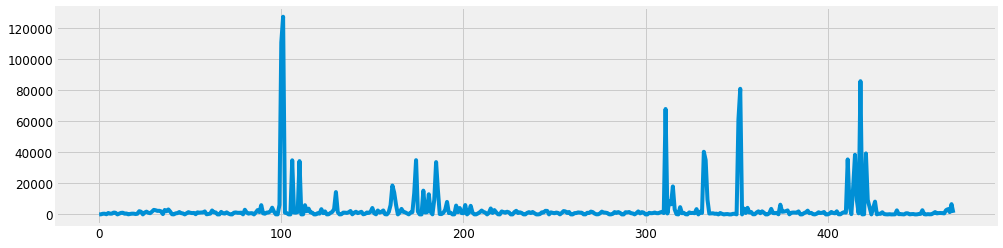

In [11]:
plt.plot(dataset)
plt.show()

In [12]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

376 94


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(56, input_shape=(1, look_back)))
#model.add(LSTM(5))
#model.add(LSTM(50), input_shape=(1, look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
374/374 - 0s - loss: 0.0086
Epoch 2/100
374/374 - 0s - loss: 0.0085
Epoch 3/100
374/374 - 0s - loss: 0.0085
Epoch 4/100
374/374 - 0s - loss: 0.0085
Epoch 5/100
374/374 - 0s - loss: 0.0085
Epoch 6/100
374/374 - 0s - loss: 0.0085
Epoch 7/100
374/374 - 0s - loss: 0.0084
Epoch 8/100
374/374 - 0s - loss: 0.0084
Epoch 9/100
374/374 - 0s - loss: 0.0083
Epoch 10/100
374/374 - 0s - loss: 0.0081
Epoch 11/100
374/374 - 0s - loss: 0.0084
Epoch 12/100
374/374 - 0s - loss: 0.0083
Epoch 13/100
374/374 - 0s - loss: 0.0083
Epoch 14/100
374/374 - 0s - loss: 0.0083
Epoch 15/100
374/374 - 0s - loss: 0.0082
Epoch 16/100
374/374 - 0s - loss: 0.0082
Epoch 17/100
374/374 - 0s - loss: 0.0082
Epoch 18/100
374/374 - 0s - loss: 0.0082
Epoch 19/100
374/374 - 0s - loss: 0.0081
Epoch 20/100
374/374 - 0s - loss: 0.0081
Epoch 21/100
374/374 - 0s - loss: 0.0081
Epoch 22/100
374/374 - 0s - loss: 0.0081
Epoch 23/100
374/374 - 0s - loss: 0.0081
Epoch 24/100
374/374 - 0s - loss: 0.0080
Epoch 25/100
374/374 - 0s

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 10766.32 RMSE
Test Score: 11252.61 RMSE


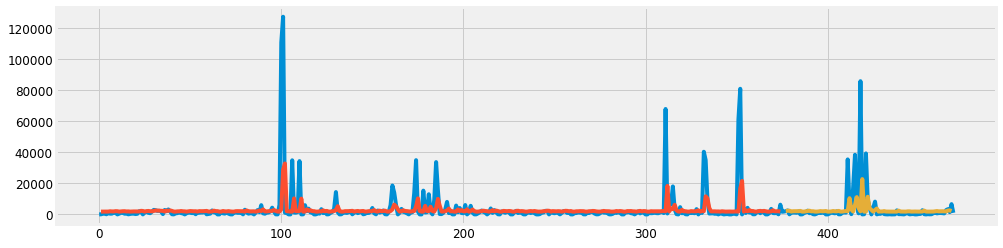

In [19]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
ax1, =plt.plot(scaler.inverse_transform(dataset))
ax2, =plt.plot(trainPredictPlot)
ax3, =plt.plot(testPredictPlot)
plt.show()

In [47]:
xdata = ax1.get_xdata()
ydata2 = ax1.get_ydata()
print("X-data of plot is: {}\nY-data for plot is: {}".format(xdata, ydata))

X-data of plot is: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 19

In [45]:
xdata = ax2.get_xdata()
ydata1 = ax2.get_ydata()
print("X-data of plot is: {}\nY-data for plot is: {}".format(xdata, ydata))

X-data of plot is: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 19

In [48]:
y1=list(ydata2)
y1

[2.0,
 79.0,
 422.0,
 468.0,
 111.0,
 914.0,
 474.0,
 497.0,
 1207.0,
 1042.0,
 2.0,
 507.99997,
 989.0,
 1095.0,
 422.0,
 614.0,
 45.999996,
 311.0,
 488.0,
 482.0,
 235.0,
 421.0,
 2087.0,
 1712.0,
 10.0,
 1229.0,
 1788.0,
 1053.0,
 794.0,
 1773.0,
 2926.0,
 2688.0,
 2270.0,
 2343.0,
 1965.0,
 204.0,
 2876.0,
 2052.0,
 3200.0,
 1840.0,
 101.0,
 29.0,
 703.0,
 832.0,
 1537.0,
 839.0,
 631.0,
 7.0,
 728.0,
 1455.0,
 1066.0,
 854.0,
 955.0,
 138.0,
 1335.0,
 1100.0,
 1238.0,
 1244.0,
 1922.0,
 75.0,
 291.0,
 509.00003,
 2544.0,
 1361.0,
 1263.0,
 3.0,
 4.0,
 1629.0,
 706.0,
 541.0,
 1344.0,
 524.0,
 53.0,
 5.0,
 1111.0,
 1276.0,
 1039.0,
 1031.0,
 1116.0,
 28.0,
 3006.0,
 1210.0,
 512.0,
 761.0,
 808.0,
 1.0,
 1242.0,
 2811.0,
 1471.0,
 5976.0,
 701.0,
 455.0,
 1187.0,
 1239.0,
 1973.0,
 4333.0,
 1778.0,
 43.0,
 25.0,
 6155.0,
 110837.0,
 127394.0,
 1091.0,
 869.0,
 10.0,
 3.0,
 34872.0,
 1208.0,
 1134.0,
 1510.0,
 34361.0,
 22.0,
 39.0,
 5952.0,
 2093.0,
 3728.0,
 1309.0,
 1168.0,
 14.

In [38]:
xdata = ax3.get_xdata()
ydata = ax3.get_ydata()
print("X-data of plot is: {}\nY-data for plot is: {}".format(xdata, ydata))

X-data of plot is: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 19

In [23]:
predicted = pd.DataFrame(trainPredictPlot[look_back:len(trainPredict)+look_back, :]).append(pd.DataFrame(testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :]))
predicted

,0
0,1805.951660
1,1824.649292
2,1907.942993
3,1919.114380
4,1832.419800
...,...
87,2006.059814
88,1963.800415
89,2473.227539
90,2623.168457


In [25]:
df1

,Order_Quantity
Checkout_Date,
2018-12-04,2
2018-12-05,79
2018-12-06,422
2018-12-07,468
2018-12-08,111
...,...
2020-05-11,2749
2020-05-12,3366
2020-05-13,1491


In [26]:
x_input=dataset[466:].reshape(1,-1)
x_input.shape

(1, 4)

In [27]:
len(dataset)

470

In [28]:
x_input

array([[0.02641433, 0.01169609, 0.05204368, 0.00798317]], dtype=float32)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.026414325460791588,
 0.01169608999043703,
 0.05204367637634277,
 0.007983170449733734]

In [30]:
temp_input[:]

[0.026414325460791588,
 0.01169608999043703,
 0.05204367637634277,
 0.007983170449733734]

In [31]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=3
i=0
while(i<15):
    
    if(len(temp_input)>3):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.01169609 0.05204368 0.00798317]
0 day output [[0.02883539]]
1 day input [0.05204368 0.00798317 0.02883539]
1 day output [[0.03128176]]
2 day input [0.00798317 0.02883539 0.03128176]
2 day output [[0.02997347]]
3 day input [0.02883539 0.03128176 0.02997347]
3 day output [[0.03271605]]
4 day input [0.03128176 0.02997347 0.03271605]
4 day output [[0.03346382]]
5 day input [0.02997347 0.03271605 0.03346382]
5 day output [[0.03396195]]
6 day input [0.03271605 0.03346382 0.03396195]
6 day output [[0.03456076]]
7 day input [0.03346382 0.03396195 0.03456076]
7 day output [[0.0348885]]
8 day input [0.03396195 0.03456076 0.0348885 ]
8 day output [[0.0351363]]
9 day input [0.03456076 0.0348885  0.0351363 ]
9 day output [[0.0353298]]
10 day input [0.0348885 0.0351363 0.0353298]
10 day output [[0.0354618]]
11 day input [0.0351363 0.0353298 0.0354618]
11 day output [[0.0355592]]
12 day input [0.0353298 0.0354618 0.0355592]
12 day output [[0.03563053]]
13 day input [0.0354618  0.035559

In [32]:
day_pred=np.arange(470,485)

In [33]:
pred=scaler.inverse_transform(lst_output)

In [34]:
pred1=pd.DataFrame(pred)
index_future_dates=pd.date_range(start='2020-05-16',end='2020-05-30')
#print(index_future_dates)
#print(comp_pred)
pred1.index=index_future_dates
print(pred1)

                      0
2020-05-16  3674.426234
2020-05-17  3986.076902
2020-05-18  3819.409644
2020-05-19  4168.796214
2020-05-20  4264.056884
2020-05-21  4327.514325
2020-05-22  4403.798604
2020-05-23  4445.550367
2020-05-24  4477.118681
2020-05-25  4501.768628
2020-05-26  4518.584750
2020-05-27  4530.993486
2020-05-28  4540.080190
2020-05-29  4546.594694
2020-05-30  4551.343300


[0]

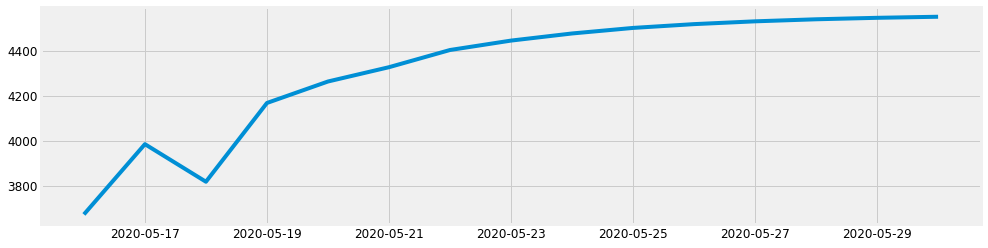

In [35]:
plt.plot(pred1)

In [36]:
# Making the Confusion Matrix
import tensorflow as tf
from sklearn.metrics import explained_variance_score,mean_absolute_error,max_error,r2_score
mape = tf.keras.losses.MeanAbsolutePercentageError()
mape(testY, testPredict.T).numpy()

10458.168